# Proyek Analisis Data: Bike Sharing Dataset

***Analisis dengan day.csv (Tingkat Harian)***
 - Bagaimana tren jumlah penyewaan sepeda harian selama 2 tahun terakhir (2011–2012)?
 -Apakah musim tertentu (spring/summer/fall/winter) memengaruhi jumlah penyewaan sepeda?
 - Bagaimana perbedaan penggunaan antara hari kerja (workingday) dan hari libur (holiday)?
 - Apa perbedaan antara pengguna casual dan registered secara agregat?
 - Apakah cuaca memengaruhi total penyewaan per hari?

***Analisis dengan hour.csv (Tingkat Jam)***
 - Jam berapa penggunaan sepeda paling tinggi dan paling rendah dalam sehari?
 - Apakah pola jam sibuk berbeda antara weekday vs weekend?
 - Bagaimana perilaku pengguna casual dan registered pada waktu tertentu?
 - Apakah kecepatan angin atau kelembaban pada jam tertentu memengaruhi jumlah peminjaman?
 - Apakah event seperti Hurricane Sandy (contoh: 2012-10-30) terlihat berdampak dalam data jamannya?

# Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
!pip install unidecode
import unidecode
import matplotlib.image as mpimg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 6.1 MB/s eta 0:00:00


# Data Wrangling

Gathering Data

In [2]:
day_df = pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Assessing Data**

Menilai Data

In [10]:
print('\n', day_df.info())
print('\n', hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data colum

apakah ada data null pada setiap DataFrame ?

In [11]:
print('\nInfo data null day:\n', day_df.isnull().sum())
print('\nInfo data null hour:\n', hour_df.isnull().sum())


Info data null day:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Info data null hour:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


ada data duplikat pada setiap DataFrame?

In [12]:
print('Info data duplikat day:', day_df.duplicated().sum())
print('Info data duplikat hour:', hour_df.duplicated().sum())

Info data duplikat day: 0
Info data duplikat hour: 0


data describe

In [14]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dikarenakan data pada day maupun hour tidak ada null dan duplikat, sehingga tidak perlu cleaning data. Lanjut ke Exploratory Data Analysis (EDA)

# Exploratory Data Analysis (EDA)

Explore day_df

In [15]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
649,650,2012-10-11,4,1,10,0,4,1,1,0.435000,0.431167,0.463333,0.181596,834,6736,7570
287,288,2011-10-15,4,0,10,0,6,0,1,0.506667,0.498725,0.483333,0.258083,1899,3318,5217
263,264,2011-09-21,3,0,9,0,3,1,2,0.595000,0.550533,0.900000,0.096404,539,3813,4352
401,402,2012-02-06,1,1,2,0,1,1,1,0.282609,0.296426,0.622174,0.153800,206,3578,3784
434,435,2012-03-10,1,1,3,0,6,0,1,0.287500,0.277767,0.350417,0.225750,968,3150,4118


In [16]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [18]:
day_df.instant.is_unique

True

In [19]:
day_df.instant.duplicated()

,instant
0,False
1,False
2,False
3,False
4,False
...,...
726,False
727,False
728,False
729,False


In [20]:
day_df.groupby('season')['instant'].nunique().sort_values(ascending=False)

,instant
season,
3,188
2,184
1,181
4,178


In [21]:
day_df.groupby('mnth')['instant'].nunique().sort_values()

,instant
mnth,
2,57
4,60
6,60
9,60
11,60
5,62
3,62
1,62
8,62


In [22]:
day_df.groupby('workingday')['instant'].nunique()

,instant
workingday,
0,231
1,500


In [23]:
day_df.groupby('weekday')['instant'].nunique()

,instant
weekday,
0,105
1,105
2,104
3,104
4,104
5,104
6,105


In [25]:
day_df.groupby('weathersit')['instant'].nunique()

,instant
weathersit,
1,463
2,247
3,21


Exploratory hour_df

In [26]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11555,11556,2012-05-01,2,1,5,16,0,2,1,1,0.74,0.6667,0.45,0.1940,41,313,354
15602,15603,2012-10-17,4,1,10,7,0,3,1,1,0.36,0.3636,0.81,0.1045,15,449,464
16108,16109,2012-11-08,4,1,11,22,0,4,1,1,0.34,0.3030,0.42,0.2985,14,147,161
10685,10686,2012-03-26,2,1,3,8,0,1,1,1,0.44,0.4394,0.62,0.2239,32,625,657
3899,3900,2011-06-16,2,0,6,9,0,4,1,2,0.62,0.6061,0.65,0.1940,29,232,261


In [27]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [28]:
hour_df.instant.is_unique

True

In [29]:
hour_df.instant.duplicated()

,instant
0,False
1,False
2,False
3,False
4,False
...,...
17374,False
17375,False
17376,False
17377,False


In [30]:
hour_df.groupby('season')['instant'].nunique().sort_values(ascending=False)

,instant
season,
3,4496
2,4409
1,4242
4,4232


In [31]:
hour_df.groupby('hr')['dteday'].nunique().sort_values(ascending=False)

,dteday
hr,
16,730
17,730
15,729
14,729
13,729
12,728
18,728
19,728
20,728


In [32]:
hour_df.groupby('mnth')['instant'].nunique().sort_values()

,instant
mnth,
2,1341
1,1429
4,1437
9,1437
11,1437
6,1440
10,1451
3,1473
8,1475


In [33]:
hour_df.groupby('workingday')['instant'].nunique()

,instant
workingday,
0,5514
1,11865


In [34]:
hour_df.groupby('weekday')['instant'].nunique()

,instant
weekday,
0,2502
1,2479
2,2453
3,2475
4,2471
5,2487
6,2512


In [35]:
hour_df.groupby('weathersit')['instant'].nunique()

,instant
weathersit,
1,11413
2,4544
3,1419
4,3


Exploratory day dan hour

Validasi Konsistensi Data Harian vs Jam-jaman

In [36]:
day_instant_hour_df = hour_df.groupby('dteday')['cnt'].sum().reset_index()
day_instant_hour_df.rename(columns={'cnt': 'cnt_hour'}, inplace=True)

merged = day_df.merge(day_instant_hour_df, on='dteday')

merged['konsistensi'] = merged['cnt'] == merged['cnt_hour']

merged[['dteday', 'cnt', 'cnt_hour', 'konsistensi']].sample(5)

,dteday,cnt,cnt_hour,konsistensi
300,2011-10-28,3747,3747,True
434,2012-03-10,4118,4118,True
100,2011-04-11,3348,3348,True
138,2011-05-19,4575,4575,True
280,2011-10-08,5409,5409,True


In [37]:
merged['konsistensi'].value_counts()

,count
konsistensi,
True,731


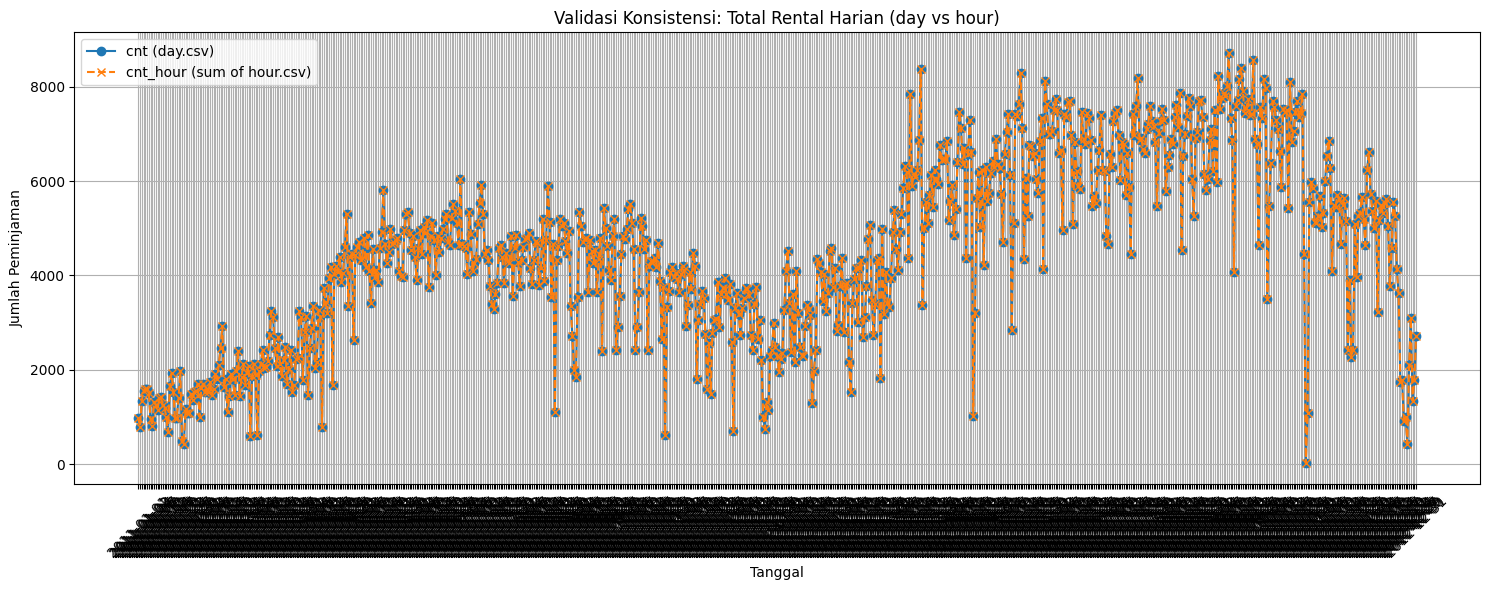

In [57]:
plt.figure(figsize=(15, 6))
plt.plot(merged['dteday'], merged['cnt'], label='cnt (day.csv)', marker='o')
plt.plot(merged['dteday'], merged['cnt_hour'], label='cnt_hour (sum of hour.csv)', linestyle='--', marker='x')
plt.title('Validasi Konsistensi: Total Rental Harian (day vs hour)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

Jam Sibuk Harian pada Hari-Hari Tertentu

In [39]:
top_days = day_df.sort_values('cnt', ascending=False).head(5)['dteday']
peak_hours = hour_df[hour_df['dteday'].isin(top_days)]

peak_hours.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14998,14999,2012-09-22,3,1,9,3,0,6,0,1,0.56,0.5303,0.83,0.2836,6,39,45
11991,11992,2012-05-19,2,1,5,20,0,6,0,1,0.68,0.6364,0.41,0.0896,118,197,315
15182,15183,2012-09-29,4,1,9,19,0,6,0,1,0.52,0.5000,0.55,0.1642,119,351,470
10622,10623,2012-03-23,2,1,3,17,0,5,1,2,0.72,0.6515,0.42,0.1642,264,693,957
14844,14845,2012-09-15,3,1,9,17,0,6,0,2,0.66,0.6212,0.36,0.2537,295,434,729


In [43]:
peak_hours['Hari_Sibuk'] = peak_hours['dteday']
peak_hours['Hari_Sibuk'] = peak_hours['Hari_Sibuk'].astype('category')
peak_hours['Hari_Sibuk'].value_counts()

/tmp/ipython-input-43-3972658551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_hours['Hari_Sibuk'] = peak_hours['dteday']
/tmp/ipython-input-43-3972658551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_hours['Hari_Sibuk'] = peak_hours['Hari_Sibuk'].astype('category')


,count
Hari_Sibuk,
2012-03-23,24
2012-05-19,24
2012-09-15,24
2012-09-22,24
2012-09-29,24


/tmp/ipython-input-58-1726233662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_hours['Hari_Sibuk'] = peak_hours['Hari_Sibuk'].astype(str)


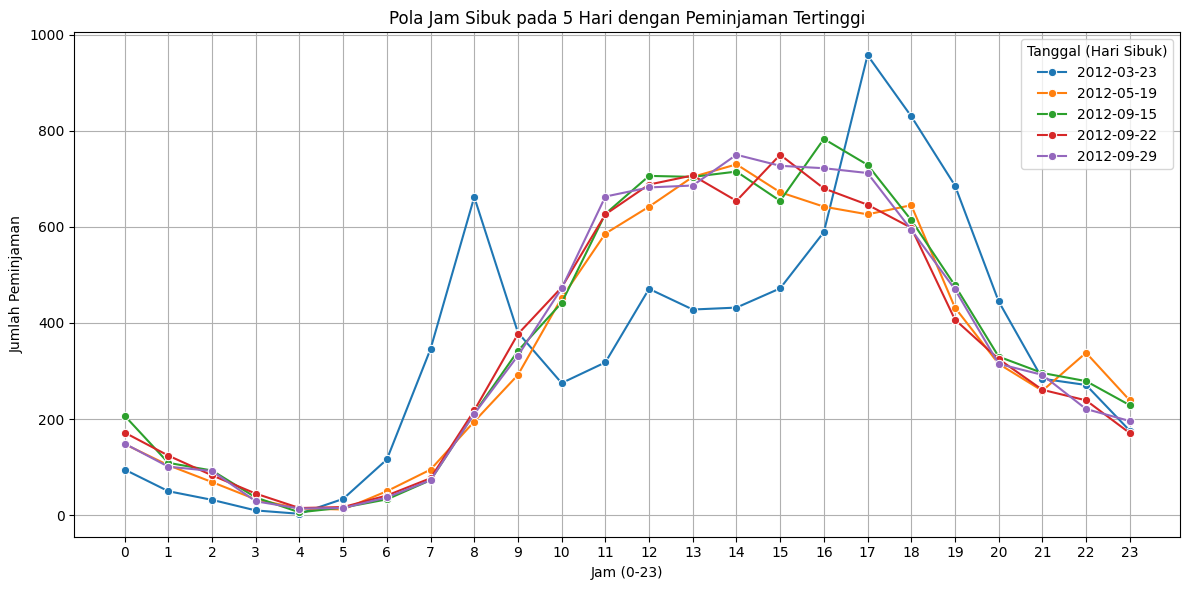

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Pastikan dteday bertipe string agar tidak kacau di legend
peak_hours['Hari_Sibuk'] = peak_hours['Hari_Sibuk'].astype(str)

# 2. Plot: Jam vs Jumlah Peminjaman, dibedakan per Hari Sibuk
plt.figure(figsize=(12,6))
sns.lineplot(data=peak_hours, x='hr', y='cnt', hue='Hari_Sibuk', marker='o')

plt.title('Pola Jam Sibuk pada 5 Hari dengan Peminjaman Tertinggi')
plt.xlabel('Jam (0-23)')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(range(0, 24))
plt.legend(title='Tanggal (Hari Sibuk)', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


Seluruh hari menunjukkan dua puncak aktivitas:
- Pagi hari sekitar jam 08.00,
- Sore hari sekitar jam 17.00–18.00.

Puncak Peminjaman Paling Tinggi:
- Tanggal 2012-03-23 memiliki lonjakan tajam di jam 08.00 dan 17.00, hingga hampir 1.000 penyewaan per jam.
- Ini menunjukkan kemungkinan event besar, kondisi cuaca ideal, atau hari kerja yang sangat aktif.

Stabilitas Peminjaman di Jam 10–16:
- Tanggal-tanggal lain (19 Mei, 15–29 September) menunjukkan distribusi penyewaan merata dari siang hingga sore hari.

Jam Sepi Konsisten:
- Rentang jam 00.00–05.00 selalu memiliki aktivitas penyewaan yang sangat rendah (<100).

sehingga hari-hari dengan penyewaan tertinggi tetap menunjukkan pola 2 puncak utama seperti hari biasa, namun dengan volume jauh lebih tinggi. Pola ini mengonfirmasi bahwa sistem bike sharing harus siaga penuh pada jam sibuk, terutama saat:
- Musim panas/gugur,
- Akhir pekan ramai,
- Atau hari kerja tertentu dengan potensi aktivitas tinggi.

 Casual vs Registered per Jam di Hari Sibuk

In [44]:
top_dates = day_df.sort_values('cnt', ascending=False).head(20)['dteday'].tolist()
hour_df['busy_day'] = hour_df['dteday'].isin(top_dates)
avg_by_hour = hour_df.groupby(['hr', 'busy_day'])[['casual', 'registered']].mean().reset_index()
avg_by_hour.sample(5)

,hr,busy_day,casual,registered
1,0,True,18.350000,95.700000
26,13,False,68.416079,176.389281
6,3,False,2.651403,8.644018
21,10,True,117.150000,259.400000
5,2,True,8.700000,42.400000


In [48]:
avg_by_hour[['casual', 'registered']].mean()

,0
casual,63.917535
registered,197.096729


In [49]:
hour_df.groupby(['hr', 'busy_day']).size().reset_index(name='jumlah_jam')

,hr,busy_day,jumlah_jam
0,0,False,706
1,0,True,20
2,1,False,704
3,1,True,20
4,2,False,695
5,2,True,20
6,3,False,677
7,3,True,20
8,4,False,677
9,4,True,20


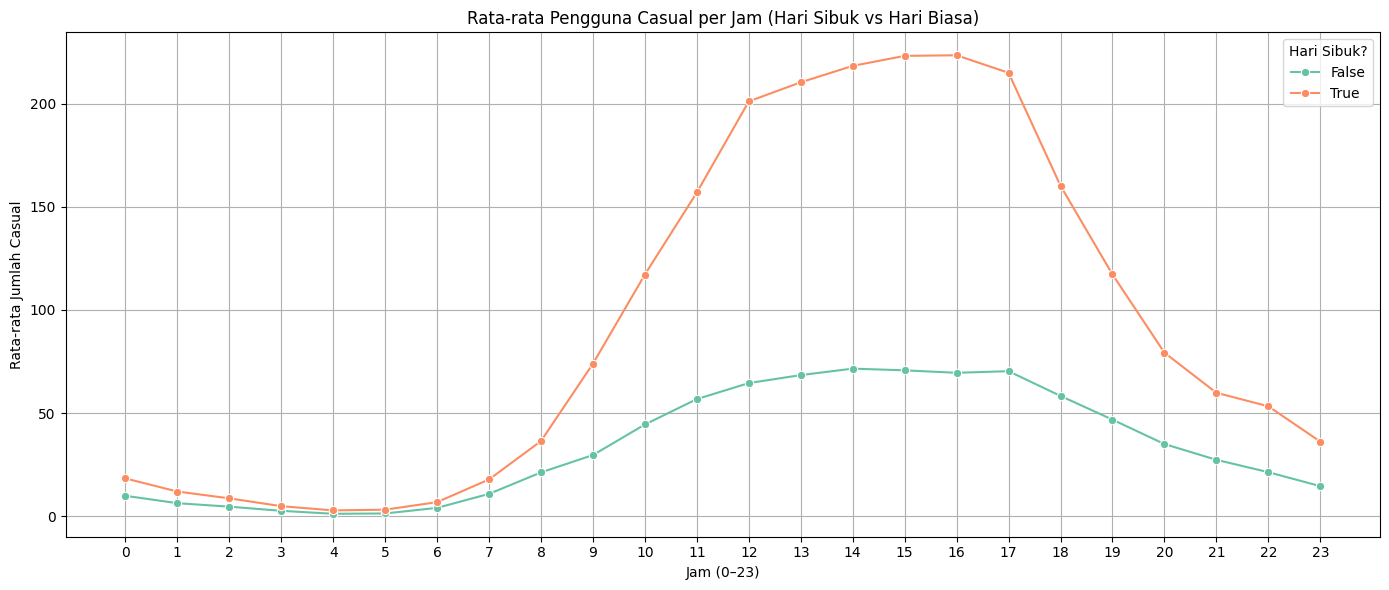

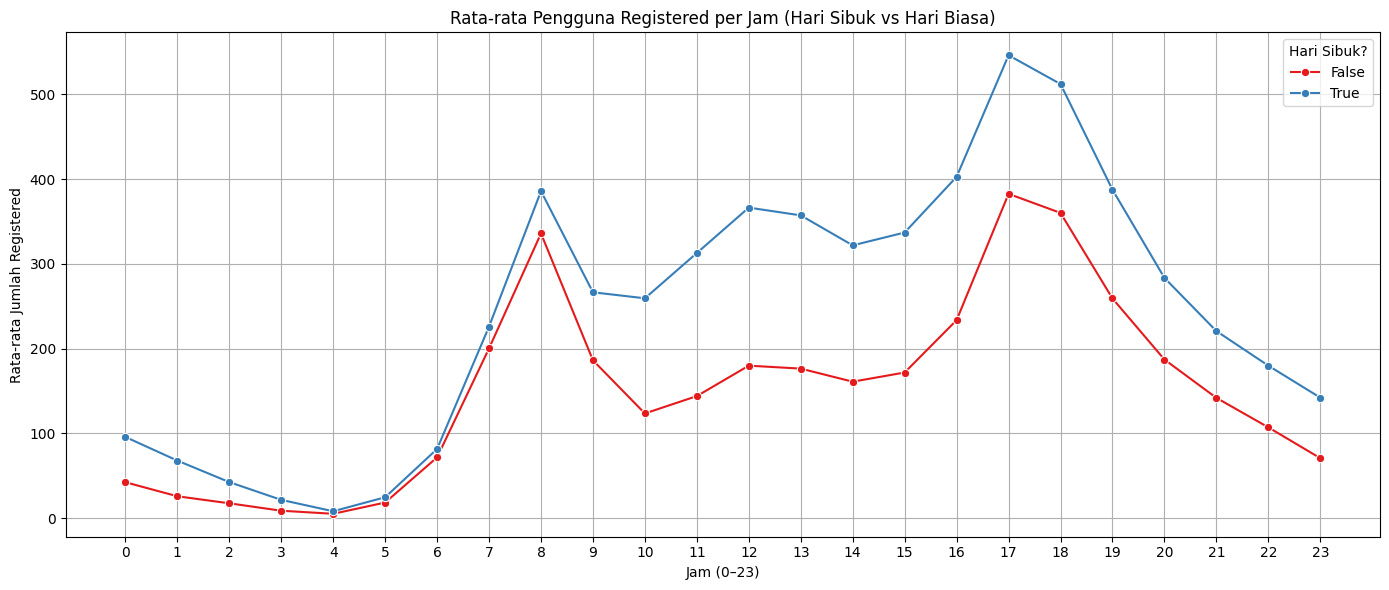

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Pastikan dataset avg_by_hour sudah ada (dari kode kamu sebelumnya)
# avg_by_hour = hour_df.groupby(['hr', 'busy_day'])[['casual', 'registered']].mean().reset_index()

# 2. Buat plot
plt.figure(figsize=(14, 6))

# Casual users
sns.lineplot(data=avg_by_hour, x='hr', y='casual', hue='busy_day', marker='o', palette='Set2')
plt.title('Rata-rata Pengguna Casual per Jam (Hari Sibuk vs Hari Biasa)')
plt.xlabel('Jam (0–23)')
plt.ylabel('Rata-rata Jumlah Casual')
plt.xticks(range(0, 24))
plt.legend(title='Hari Sibuk?')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Plot untuk Registered users
plt.figure(figsize=(14, 6))
sns.lineplot(data=avg_by_hour, x='hr', y='registered', hue='busy_day', marker='o', palette='Set1')
plt.title('Rata-rata Pengguna Registered per Jam (Hari Sibuk vs Hari Biasa)')
plt.xlabel('Jam (0–23)')
plt.ylabel('Rata-rata Jumlah Registered')
plt.xticks(range(0, 24))
plt.legend(title='Hari Sibuk?')
plt.grid(True)
plt.tight_layout()
plt.show()


Grafik di atas menunjukkan perbandingan rata-rata jumlah pengguna casual (non-registered) berdasarkan jam dalam sehari, dibedakan antara hari sibuk (20 hari dengan penyewaan tertinggi) dan hari biasa.

Dari visualisasi tersebut, terlihat bahwa pengguna casual cenderung lebih aktif secara signifikan pada hari-hari sibuk dibandingkan hari biasa. Pada hari biasa, pola penggunaan relatif landai, dengan puncak kecil di siang hingga sore hari (sekitar pukul 14.00–17.00), dan jumlah rata-rata pengguna tidak pernah melebihi 75 orang per jam.

Sebaliknya, pada hari sibuk, terjadi lonjakan tajam mulai pukul 09.00 yang terus meningkat hingga puncaknya sekitar pukul 15.00–16.00, dengan rata-rata lebih dari 220 pengguna casual per jam. Setelah itu, terjadi penurunan bertahap menjelang malam.

Pola ini menunjukkan bahwa pengguna casual — yang umumnya menggunakan sepeda untuk aktivitas santai, wisata, atau liburan — sangat terpengaruh oleh momen spesifik seperti akhir pekan, musim cerah, atau event khusus. Mereka cenderung melakukan aktivitas luar ruangan secara kolektif di siang hari pada waktu-waktu populer tersebut.

Pola Jam-jam Tertentu di Cuaca Buruk

In [61]:
bad_weather = hour_df[hour_df['weathersit'] == 3]
bad_weather_avg = bad_weather.groupby('hr')['cnt'].mean().reset_index()

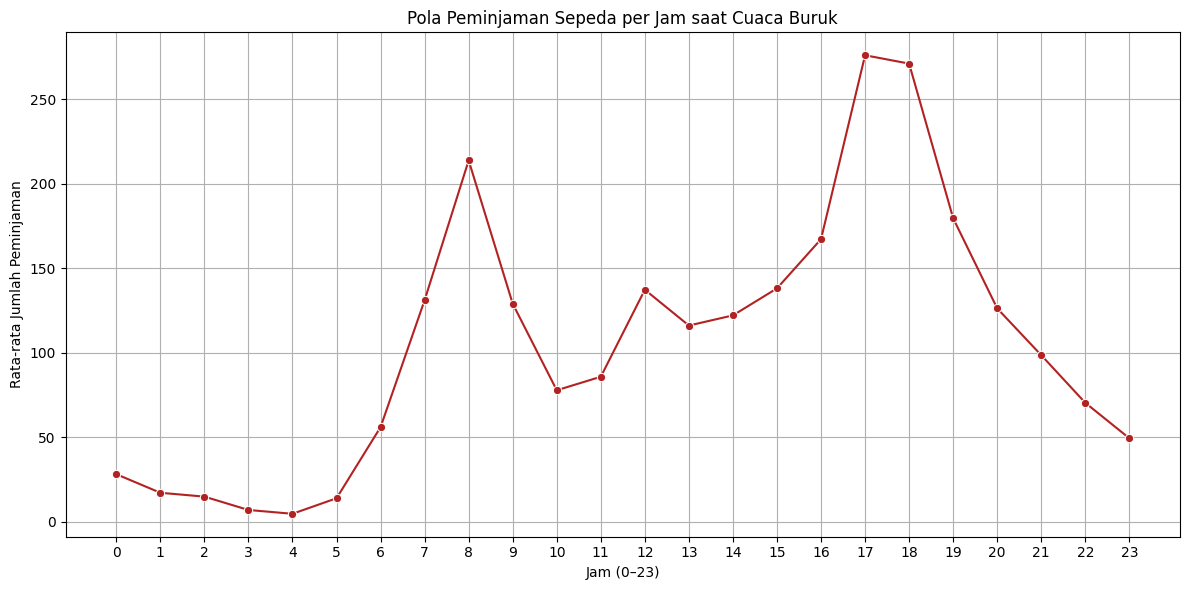

In [62]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=bad_weather_avg, x='hr', y='cnt', marker='o', color='firebrick')
plt.title('Pola Peminjaman Sepeda per Jam saat Cuaca Buruk')
plt.xlabel('Jam (0–23)')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

Grafik menunjukkan rata-rata jumlah peminjaman sepeda per jam pada hari-hari dengan cuaca buruk, yaitu saat weathersit = 3 (hujan ringan, salju ringan, badai ringan). Meskipun kondisi lingkungan tidak ideal, pola penggunaan sepeda tetap memperlihatkan dua puncak utama pada jam 08.00 dan 17.00–18.00, yang menandakan aktivitas komuter masih berlangsung walaupun dalam cuaca tidak bersahabat.

Namun, secara keseluruhan, volume peminjaman cenderung lebih rendah dibandingkan hari-hari cerah. Peminjaman pada dini hari (00.00–05.00) sangat minim, dan baru mulai meningkat menjelang jam 7 pagi. Setelah puncak pagi, terjadi penurunan sementara di siang hari, namun kembali meningkat menjelang sore, menunjukkan pola aktivitas kerja.

Yang menarik, lonjakan sore (jam 17–18) justru sedikit lebih tinggi dibandingkan pagi hari, kemungkinan karena pengguna yang tetap harus kembali pulang meski cuaca memburuk. Artinya, meskipun cuaca buruk mengurangi jumlah pengguna sepeda secara keseluruhan, pengguna dengan kebutuhan mobilitas tetap melakukan perjalanan dengan sepeda.

# Visualization & Explanatory Analysis

Pertanyaan untu data day

**Pertanyaan 1: Bagaimana tren jumlah penyewaan sepeda harian selama 2 tahun terakhir (2011–2012)?**

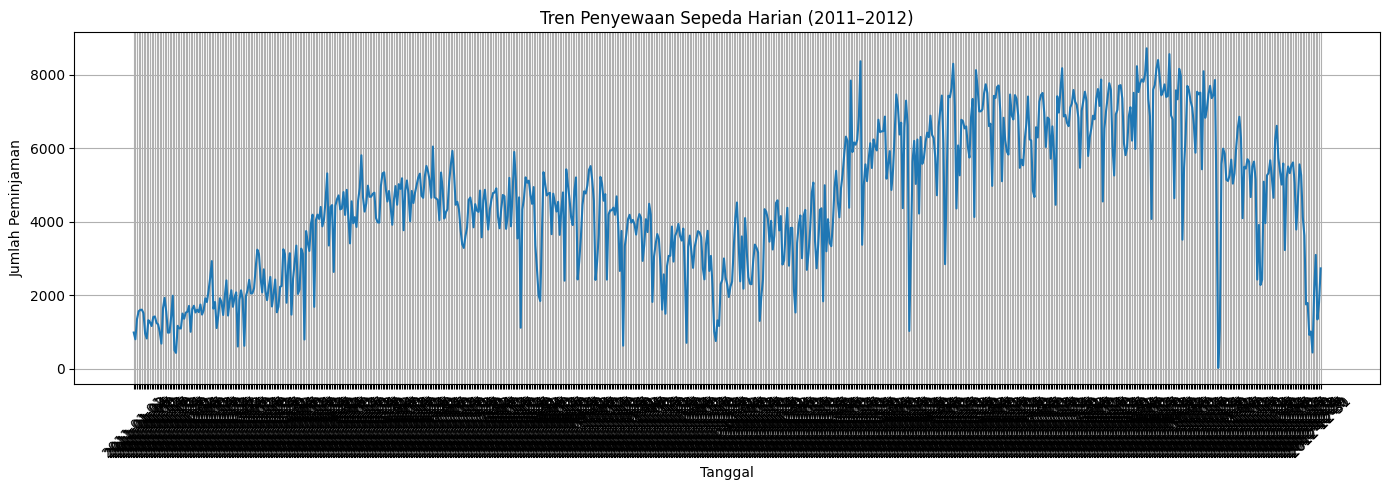

In [63]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=day_df, x='dteday', y='cnt')
plt.title('Tren Penyewaan Sepeda Harian (2011–2012)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("1_tren_harian.png", dpi=300)
plt.show()

**Pertanyaan 2: Apakah musim tertentu (spring/summer/fall/winter) memengaruhi jumlah penyewaan sepeda?**

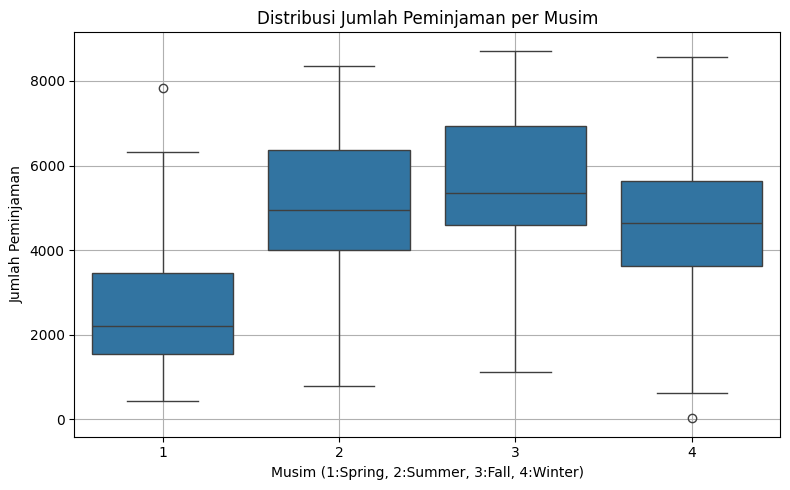

In [64]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=day_df, x='season', y='cnt')
plt.title('Distribusi Jumlah Peminjaman per Musim')
plt.xlabel('Musim (1:Spring, 2:Summer, 3:Fall, 4:Winter)')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.tight_layout()
plt.savefig("2_per_musim.png", dpi=300)
plt.show()

**Pertanyaan 3: Bagaimana perbedaan penggunaan antara hari kerja (workingday) dan hari libur (holiday)?**

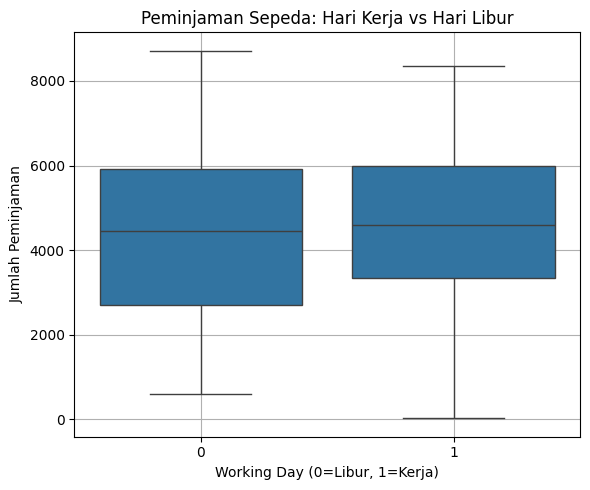

In [65]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=day_df, x='workingday', y='cnt')
plt.title('Peminjaman Sepeda: Hari Kerja vs Hari Libur')
plt.xlabel('Working Day (0=Libur, 1=Kerja)')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.tight_layout()
plt.savefig("3_workingday_vs_libur.png", dpi=300)
plt.show()

**Pertanyaan 4:Apa perbedaan antara pengguna casual dan registered secara agregat?**

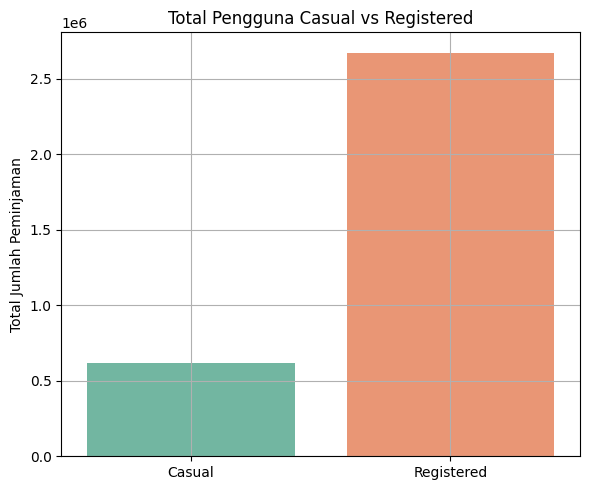

In [66]:
casual_total = day_df['casual'].sum()
registered_total = day_df['registered'].sum()

plt.figure(figsize=(6, 5))
sns.barplot(x=['Casual', 'Registered'], y=[casual_total, registered_total], palette='Set2')
plt.title('Total Pengguna Casual vs Registered')
plt.ylabel('Total Jumlah Peminjaman')
plt.grid(True)
plt.tight_layout()
plt.savefig("4_casual_vs_registered.png", dpi=300)
plt.show()

**Pertanyaan 5: Apakah cuaca memengaruhi total penyewaan per hari?**

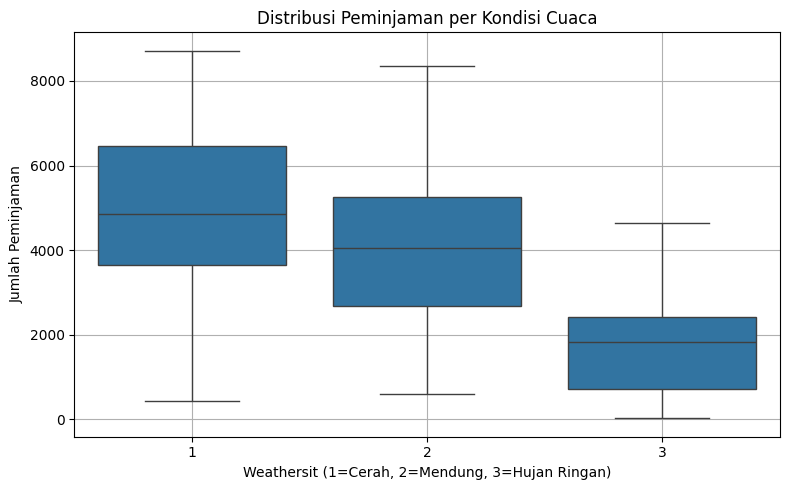

In [67]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=day_df, x='weathersit', y='cnt')
plt.title('Distribusi Peminjaman per Kondisi Cuaca')
plt.xlabel('Weathersit (1=Cerah, 2=Mendung, 3=Hujan Ringan)')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.tight_layout()
plt.savefig("5_per_cuaca.png", dpi=300)
plt.show()

Pertanyaan data hour

**Pertanyaan 1: Jam berapa penggunaan sepeda paling tinggi dan paling rendah dalam sehari?**

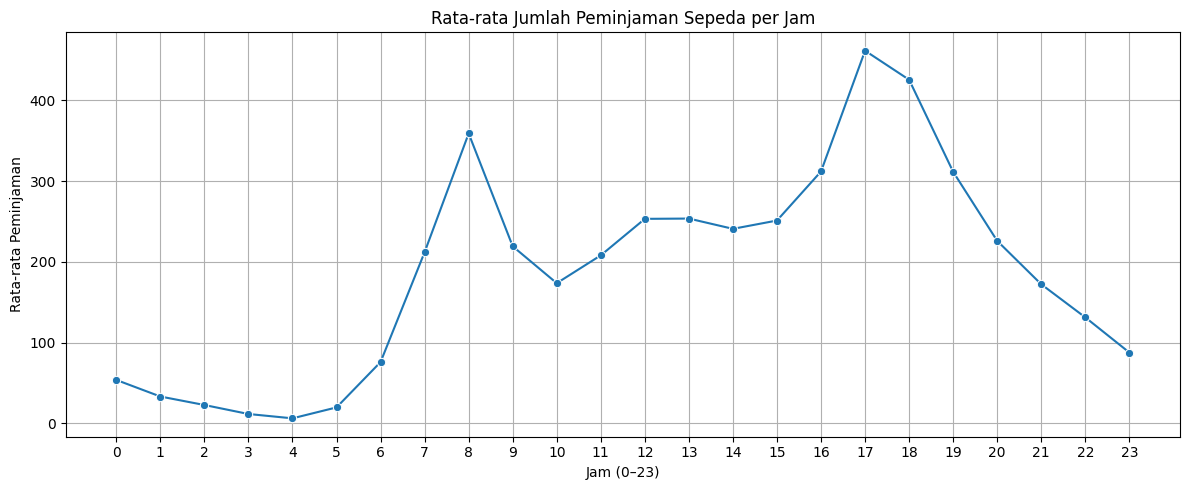

In [68]:
avg_hour = hour_df.groupby('hr')['cnt'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=avg_hour, x='hr', y='cnt', marker='o')
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Jam')
plt.xlabel('Jam (0–23)')
plt.ylabel('Rata-rata Peminjaman')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.savefig("1_jam_sibuk.png", dpi=300)
plt.show()

**Pertanyaan 2: Apakah pola jam sibuk berbeda antara weekday vs weekend?**

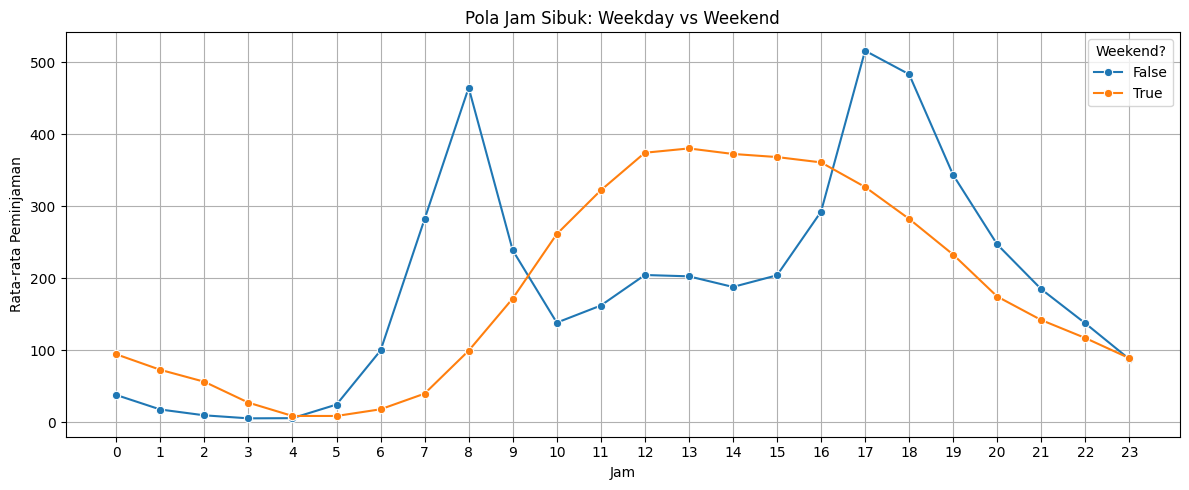

In [69]:
hour_df['is_weekend'] = hour_df['weekday'].isin([0, 6])
avg_hour_week = hour_df.groupby(['hr', 'is_weekend'])['cnt'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=avg_hour_week, x='hr', y='cnt', hue='is_weekend', marker='o')
plt.title('Pola Jam Sibuk: Weekday vs Weekend')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Peminjaman')
plt.xticks(range(0, 24))
plt.legend(title='Weekend?')
plt.grid(True)
plt.tight_layout()
plt.savefig("2_weekday_vs_weekend.png", dpi=300)
plt.show()

**Pertanyaan 3: Bagaimana perilaku pengguna casual dan registered pada waktu tertentu?**

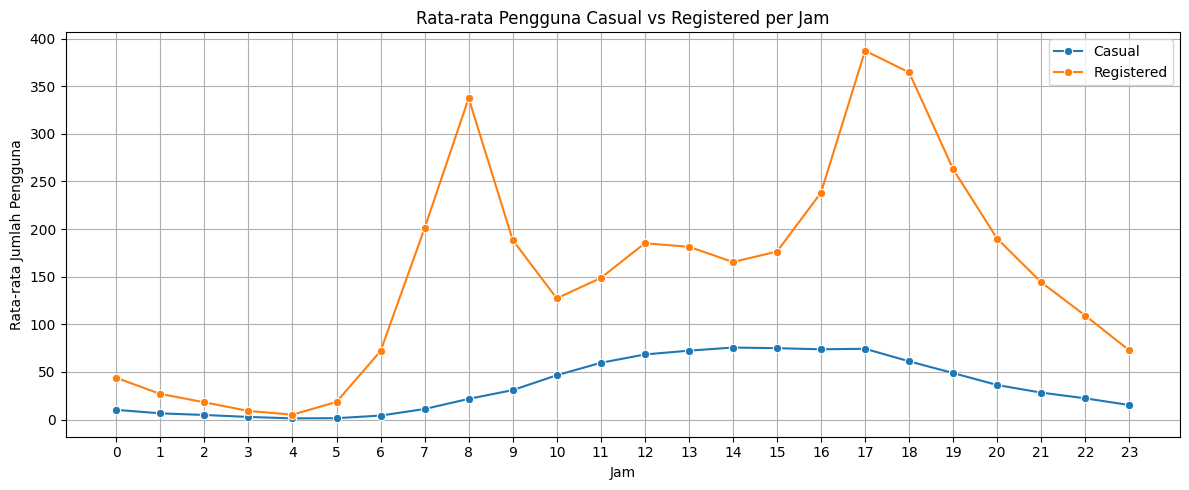

In [70]:
avg_casual_registered = hour_df.groupby('hr')[['casual', 'registered']].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=avg_casual_registered, x='hr', y='casual', label='Casual', marker='o')
sns.lineplot(data=avg_casual_registered, x='hr', y='registered', label='Registered', marker='o')
plt.title('Rata-rata Pengguna Casual vs Registered per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("3_casual_vs_registered.png", dpi=300)
plt.show()

**Pertanyaan 4: Apakah kecepatan angin atau kelembaban pada jam tertentu memengaruhi jumlah peminjaman?**

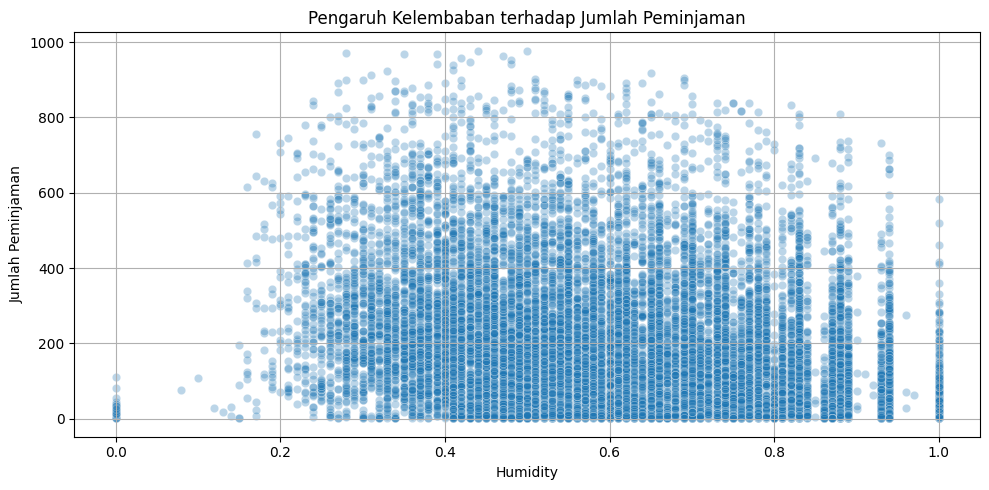

In [71]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=hour_df, x='hum', y='cnt', alpha=0.3)
plt.title('Pengaruh Kelembaban terhadap Jumlah Peminjaman')
plt.xlabel('Humidity')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.tight_layout()
plt.savefig("4_pengaruh_kelembaban.png", dpi=300)
plt.show()

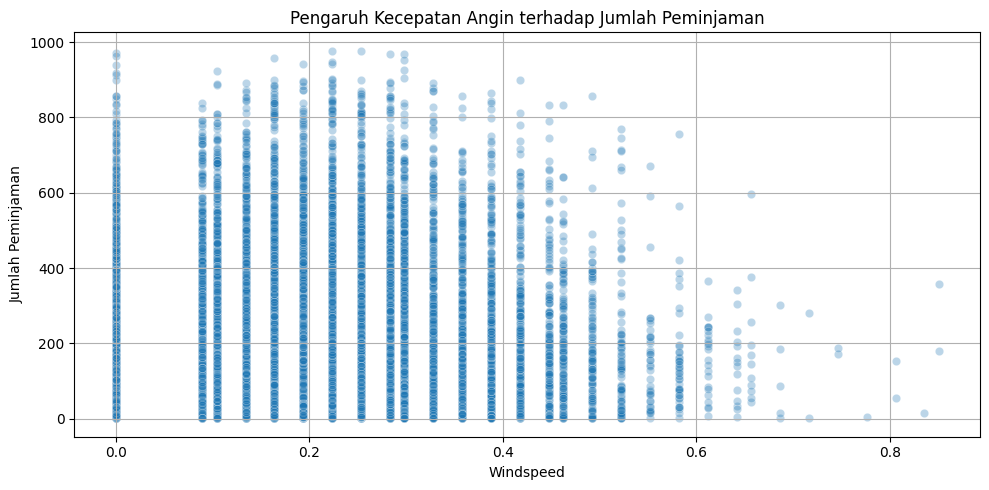

In [72]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=hour_df, x='windspeed', y='cnt', alpha=0.3)
plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Peminjaman')
plt.xlabel('Windspeed')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.tight_layout()
plt.savefig("5_pengaruh_angin.png", dpi=300)
plt.show()

**Pertanyaan 5: Apakah event seperti Hurricane Sandy (contoh: 2012-10-30) terlihat berdampak dalam data jamannya?**

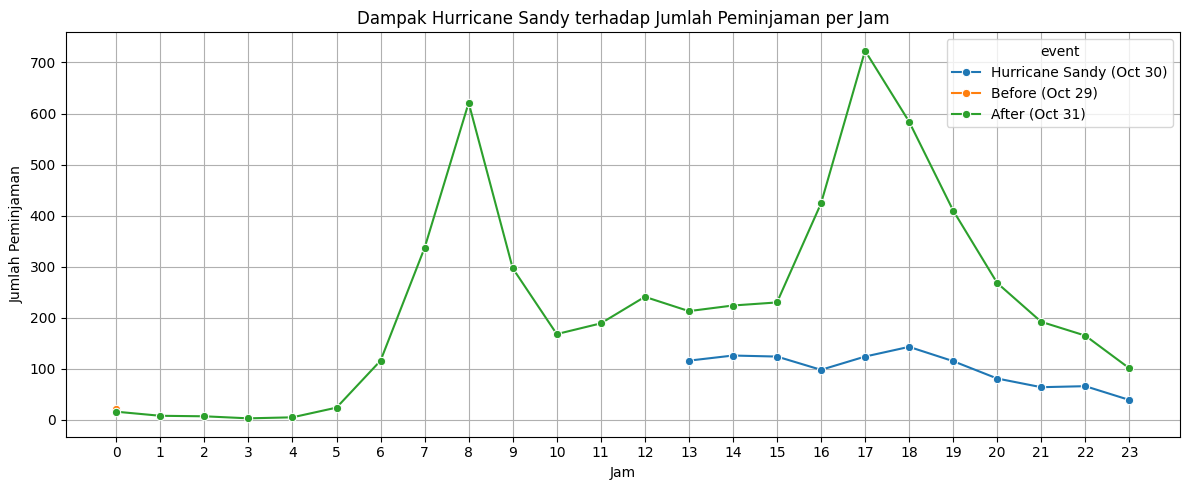

In [73]:
sandy_date = hour_df[hour_df['dteday'] == '2012-10-30']
before_sandy = hour_df[hour_df['dteday'] == '2012-10-29']
after_sandy = hour_df[hour_df['dteday'] == '2012-10-31']

sandy_plot = pd.concat([
    sandy_date.assign(event='Hurricane Sandy (Oct 30)'),
    before_sandy.assign(event='Before (Oct 29)'),
    after_sandy.assign(event='After (Oct 31)')
])

plt.figure(figsize=(12, 5))
sns.lineplot(data=sandy_plot, x='hr', y='cnt', hue='event', marker='o')
plt.title('Dampak Hurricane Sandy terhadap Jumlah Peminjaman per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.savefig("6_dampak_hurricane_sandy.png", dpi=300)
plt.show()

# Conclusion

Pertanya data pada day

1.   Bagaimana tren jumlah penyewaan sepeda harian selama 2 tahun terakhir (2011–2012)?

  - Terjadi tren kenaikan jumlah peminjaman dari awal 2011 hingga akhir 2012.

  - Puncak peminjaman cenderung terjadi di pertengahan tahun kedua (musim panas/gugur 2012).

  - Fluktuasi musiman sangat terlihat, terutama di akhir dan awal tahun (jumlah peminjaman rendah saat musim dingin).

2. Apakah musim tertentu (spring/summer/fall/winter) memengaruhi jumlah penyewaan sepeda?
  - Musim gugur (3) dan musim panas (2) menunjukkan median dan kuartil atas tertinggi.
  - Musim semi (1) memiliki penyewaan terendah dan outlier ke bawah.
  - Cuaca hangat sangat berkontribusi pada tingginya minat penggunaan sepeda.

3. Bagaimana perbedaan penggunaan antara hari kerja (workingday) dan hari libur (holiday)?
  - Rata-rata peminjaman di hari kerja (workingday = 1) sedikit lebih tinggi, tetapi tidak signifikan secara visual.
  - Ini menunjukkan sepeda digunakan baik untuk aktivitas produktif (commute) maupun rekreasi (weekend).

4. Apa perbedaan antara pengguna casual dan registered secara agregat?
  - Registered users mendominasi total jumlah peminjaman sepeda (lebih dari 4x lipat dari casual).
  - Hal ini menunjukkan loyalitas tinggi dari pengguna terdaftar, mungkin karena kebutuhan rutin (berangkat kerja, sekolah, dll).
  - Casual users tetap signifikan, kemungkinan besar untuk rekreasi atau turis.

5. Apakah cuaca memengaruhi total penyewaan per hari?
  - Cuaca cerah (weathersit = 1) memiliki jumlah peminjaman yang paling tinggi dan stabil.
  - Pada cuaca mendung (2) atau hujan ringan/salju ringan (3), jumlah peminjaman turun drastis.
  - Menunjukkan bahwa kondisi cuaca sangat memengaruhi keputusan pengguna untuk menyewa sepeda.

Pertanyaan data pada hour

1. Jam berapa penggunaan sepeda paling tinggi dan paling rendah dalam sehari?
  - Jam paling tinggi: pukul 08.00 dan 17.00–18.00, menunjukkan pola commuter (berangkat dan pulang kerja).
  - Jam paling rendah: pukul 02.00–04.00 dini hari, hampir tidak ada aktivitas penyewaan.

2. Apakah pola jam sibuk berbeda antara weekday vs weekend?
  - Weekday: dua puncak tajam pada jam 08.00 dan 17.00 (perjalanan kerja).
  - Weekend: distribusi peminjaman lebih merata dari siang hingga sore.

3. Bagaimana perilaku pengguna casual dan registered pada waktu tertentu?
  - Registered users dominan di jam sibuk weekday.
  - Casual users ramai siang hari (sekitar jam 11.00–17.00), terutama di akhir pekan.

4. Apakah kecepatan angin atau kelembaban pada jam tertentu memengaruhi jumlah peminjaman?
  - Kelembaban tinggi cenderung berkorelasi negatif terhadap peminjaman.
  - Kecepatan angin tidak terlalu berpengaruh signifikan, tapi peminjaman sedikit menurun di kecepatan tinggi.

5. Apakah event seperti Hurricane Sandy (contoh: 2012-10-30) terlihat berdampak dalam data jamannya?
  - Jumlah peminjaman turun drastis pada 30 Oktober dibandingkan hari sebelumnya (29) dan sesudahnya (31).
  - Hal ini membuktikan bahwa event besar atau bencana alam berdampak langsung pada perilaku pengguna.